# Linear Regression From Scratch

### Import library and setup dependency

#### Universal library

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 3 decimal places, no scientific notation
np.set_printoptions(precision=3, suppress=True)

#### Customize library

In [45]:
import os
import sys

# Set project root
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(project_root)

print(f"current: {os.getcwd()}")
print(f"root   : {project_root}")

current: c:\Users\BTCOM\Desktop\DeepLearning\ML01-linear-regression-from-scratch\research
root   : c:\Users\BTCOM\Desktop\DeepLearning\ML01-linear-regression-from-scratch


In [46]:
import custom_library.utils as ut
import custom_library.models as my_models

# Set autoreload for external modules change
%load_ext autoreload 
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### ML: No Hidden layer, 1 overall neural


#### Load dataset and Set up models

In [47]:
# Overview (Machine Learning from Scratch):
# Input layer: 500 sample_dims with 2 features input each 
# First Hidden Layer: -
# Penultimate Layer: -
# Output Layer: 1 nerual network, no activate funciton
sample_dim = 500
split_ration = 0.8
input_dim = 2
output_dim = 1

# Generate some linear sample_dim data
linear = np.linspace(0.0, 1, 500).reshape(-1, 1)

# y_pred = X * w + b
# y_pred [sameple, t_dim] = X [sample_dim, input_dim] * w [input_dim, output_dim] + b [1, output_dim]
# y_pred [500,] = X [500,2] * w [2,] + b [1,]
y_true =  pow(linear,3) + np.random.rand(500,1)*0.02
y_pred = np.random.rand(sample_dim,output_dim)  
X = np.column_stack((linear, 1-linear)) + np.random.rand(500,1)*0.1
W1 = np.random.rand(input_dim,output_dim)  # one weight per feature
b1 = np.random.rand(1,output_dim)  # single bias term

# Split dataset
X_train, y_train, X_eval, y_eval = ut.split_data(X, y_true, split_ration)
y_pred = np.random.rand(y_eval.shape[0], y_eval.shape[1])

# Hyperparameters
epochs = 1000
batch_size = 32
learning_rate = 0.001

#### Visualize Dataset

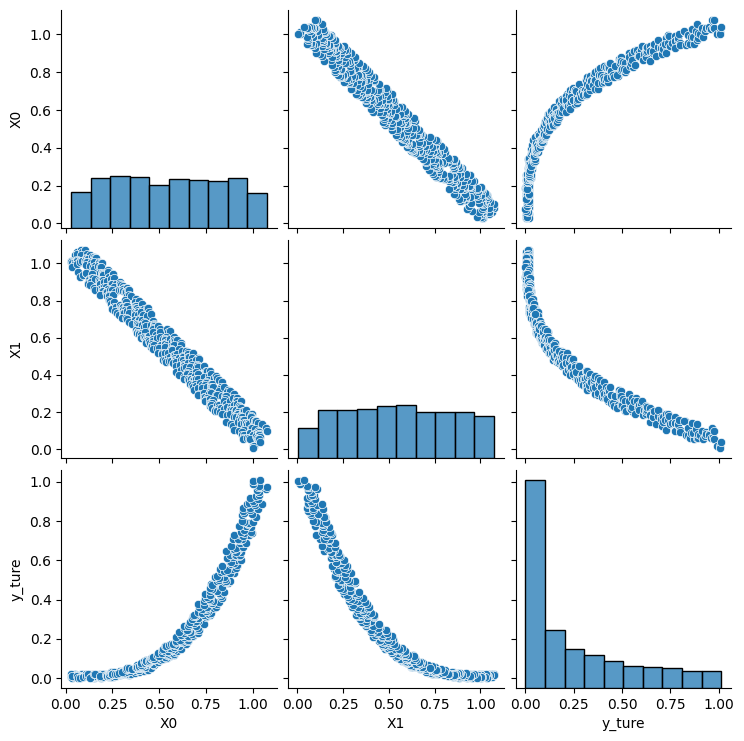

In [48]:
# put your inputs and outputs together in one DataFrame
df = pd.DataFrame(X, columns=[f"X{i}" for i in range(X.shape[1])])
df["y_ture"] = y_true if y_true.ndim == 1 else y_true[:,0]

# make the pairplot
sns.pairplot(df)

#### Train Models

In [49]:
def fit_linear_regression_no_hidden_layer(X_train, y_train, X_eval, y_eval, W1, b1, epochs=10, batch_size=32, learning_rate=0.001):
    train_accs = []
    val_accs = []

    for j in range(epochs):
        for i in range(0, len(X_train), batch_size):
            # Fetch the batch
            X_train_batch = X_train[i:i+batch_size]
            y_train_batch = y_train[i:i+batch_size]

            # Forward pass
            y_pred_batch = np.dot(X_train_batch, W1) + b1

            # Compute gradients
            # Mean Squared Error Loss: L = (1/N) * Σ(y_true - y_pred)^2
            # Gradient of L w.r.t. y_pred: dL/da = (2/N) * (y_pred - y_true)
            dL_dz = (2/batch_size) * (y_pred_batch - y_train_batch) 

            # Gradient of L w.r.t. W1: dL/dW1 = X^T * dL/da
            # Summation of Xi * Li, (1,500) * (500,1) = (1,1)
            dw = np.dot(X_train_batch.T, dL_dz)

            # Gradient of L w.r.t. b1: dL/db1 = Σ(dL/da)
            db = np.sum(dL_dz, axis=0, keepdims=True)

            # Update weights and bias
            # Gradient Descent update rule
            # W = W - learning_rate * dL/dW
            W1 -= learning_rate * dw

            # b = b - learning_rate * dL/db
            b1 -= learning_rate * db

        # Evaluate accuracy on the entire dataset after each epoch
        y_train_pred = np.dot(X_train, W1) + b1
        y_eval_pred = np.dot(X_eval, W1) + b1
        print(f"Epoch {j+1}/{epochs} accuracy: {ut.accuracy(y_eval, y_eval_pred):.3f}")

        # Score History
        train_acc = ut.accuracy(y_train, y_train_pred)
        val_acc = ut.accuracy(y_eval, y_eval_pred)
        train_accs.append(train_acc)
        val_accs.append(val_acc)

    y_pred = np.dot(X_eval, W1) + b1
    return W1, b1, y_pred, train_accs, val_accs

In [50]:
"Before training, accuracy: {:.3f}".format(ut.accuracy(y_eval, y_pred))

'Before training, accuracy: 0.428'

In [51]:
W1, b1, y_pred, train_accs, val_accs = fit_linear_regression_no_hidden_layer(X_train, y_train, X_eval, y_eval, W1, b1, epochs=epochs, batch_size=batch_size, learning_rate=learning_rate)

Epoch 1/1000 accuracy: 0.469
Epoch 2/1000 accuracy: 0.458
Epoch 3/1000 accuracy: 0.448
Epoch 4/1000 accuracy: 0.439
Epoch 5/1000 accuracy: 0.430
Epoch 6/1000 accuracy: 0.422
Epoch 7/1000 accuracy: 0.414
Epoch 8/1000 accuracy: 0.406
Epoch 9/1000 accuracy: 0.398
Epoch 10/1000 accuracy: 0.391
Epoch 11/1000 accuracy: 0.385
Epoch 12/1000 accuracy: 0.378
Epoch 13/1000 accuracy: 0.372
Epoch 14/1000 accuracy: 0.365
Epoch 15/1000 accuracy: 0.359
Epoch 16/1000 accuracy: 0.354
Epoch 17/1000 accuracy: 0.348
Epoch 18/1000 accuracy: 0.343
Epoch 19/1000 accuracy: 0.339
Epoch 20/1000 accuracy: 0.334
Epoch 21/1000 accuracy: 0.329
Epoch 22/1000 accuracy: 0.325
Epoch 23/1000 accuracy: 0.321
Epoch 24/1000 accuracy: 0.317
Epoch 25/1000 accuracy: 0.313
Epoch 26/1000 accuracy: 0.310
Epoch 27/1000 accuracy: 0.306
Epoch 28/1000 accuracy: 0.303
Epoch 29/1000 accuracy: 0.300
Epoch 30/1000 accuracy: 0.297
Epoch 31/1000 accuracy: 0.293
Epoch 32/1000 accuracy: 0.291
Epoch 33/1000 accuracy: 0.288
Epoch 34/1000 accur

In [52]:
"After training, accuracy: {:}".format(ut.accuracy(y_eval, y_pred))

'After training, accuracy: 0.11112765652542615'

#### Evaluate Models

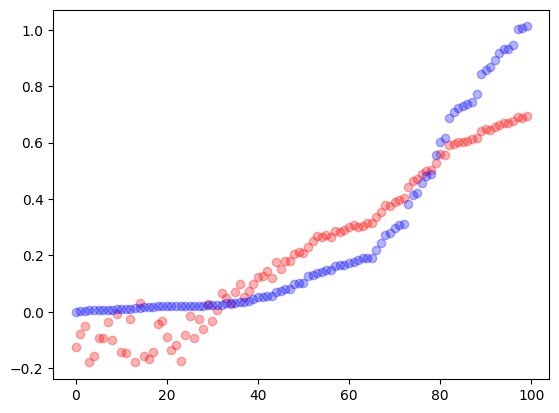

In [53]:
y_pred_sort, y_eval_sort = ut.sort_data(y_pred, y_eval)

i = range(len(y_pred_sort))
plt.scatter(i, y_pred_sort, alpha=0.3, color='red', label='Predictions')
plt.scatter(i, y_eval_sort, alpha=0.3, color='blue', label='True Values')

plt.show()

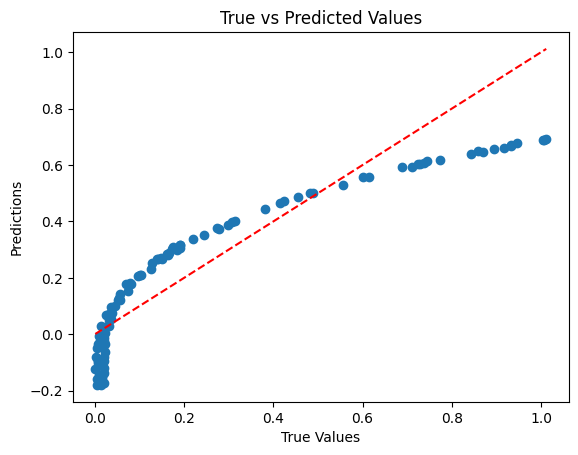

In [54]:
# 1. y_true vs y_pred
plt.scatter(y_eval, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.plot([y_eval.min(), y_eval.max()], [y_eval.min(), y_eval.max()], 'r--')
plt.title('True vs Predicted Values')
plt.show()


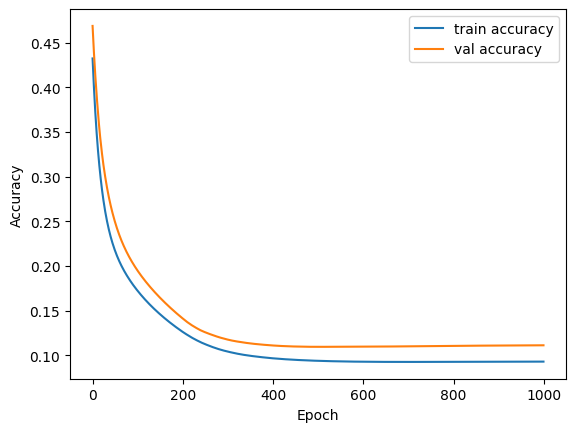

In [55]:
plt.plot(train_accs, label='train accuracy')
plt.plot(val_accs, label='val accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### DL: 1 hidden layer, 3 overall neurals

#### Load dataset and Set up models

In [56]:
# Overview (Deep Learning from Scratch):
# Input layer: 500 sample_dims with 2 features input each 
# First Hidden Layer: 2 input dim, 2 output dim, ReLU activate funciton
# Output Layer: 2 input dim, 1 output dim, no activate funciton
# Input (500,2) -> Hidden Layer 2 neurals (2,2) -> Output 1 neural (2,1)

sample_dim = 5000
split_ration = 0.8
input_dim = 2
h_dim = 300
output_dim = 1

# Generate some linear sample_dim data
# linear [sample_dim_dim, 1]
linear = np.linspace(-1, 1, sample_dim).reshape(-1, 1)

# z1 = X * W1 + b1
# z1 [sample_dim, h_dim] = X [sample_dim, input_dim] * W1 [input_dim, h_dim] + b1 [1, h_dim]

# a1 = relu(z1)
# a1 [sample_dim, h_dim] = relu(z1) [sample_dim, h_dim]

# z2 = a1 * W2 + b2
# z2 [sample_dim, output_dim] = a1 [sample_dim, h_dim] * W2 [h_dim, output_dim] + b2 [1, output_dim]
# y_pred = z2

# z [sample_dim, output_dim]
y_true = np.pow(linear,3) - np.pow(linear+0.2,2)*0.5 + np.pow(linear,2)*np.random.rand(sample_dim,output_dim)*0.1

# X [sample_dim, input_dim]
X = np.column_stack((linear, np.pow(linear, 2))).reshape(sample_dim, input_dim)+ np.random.rand(sample_dim,input_dim)*0.1

# Split dataset
X_train, y_train, X_eval, y_eval = ut.split_data(X, y_true, split_ration)
y_pred = np.random.rand(y_eval.shape[0], y_eval.shape[1])

# W1 [input_dim, h_dim]
# b1 [1, h_dim]

W1 = np.random.rand(input_dim,h_dim)*0.7+0.3
b1 = np.random.rand(1,h_dim)*0.7+0.3

# W2 [h_dim, output_dim]
# b2 [1, output_dim]
W2 = np.random.rand(h_dim,output_dim)*0.7+0.3
b2 = np.random.rand(1,output_dim)*0.7+0.3

# Hyperparameters
epochs = 100
batch_size = 16
learning_rate = 0.001

In [57]:
np.random.randint(30, 100, (10, 1))/100

array([[0.95],
       [0.65],
       [0.64],
       [0.5 ],
       [0.64],
       [0.67],
       [0.55],
       [0.96],
       [0.93],
       [0.96]])

#### Visualize Dataset

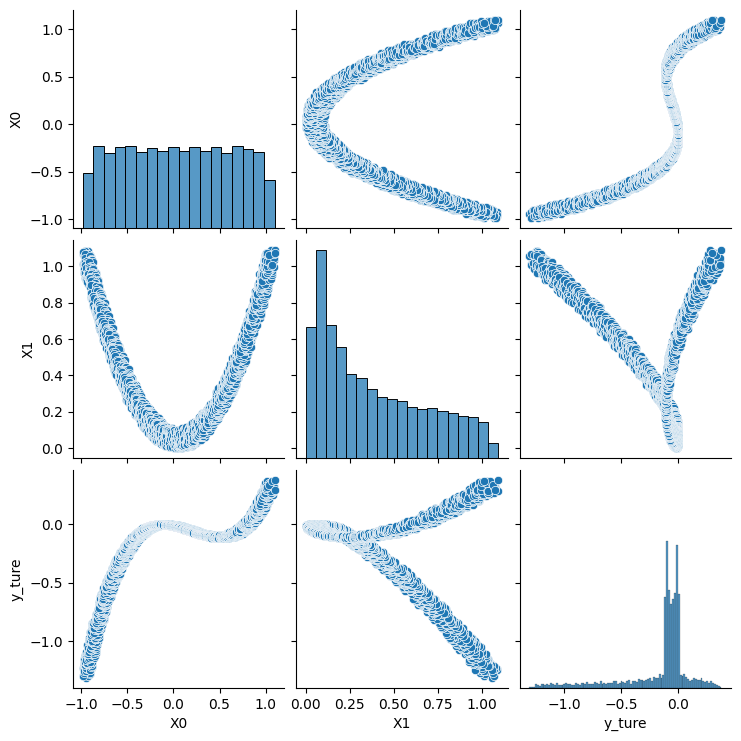

In [58]:
# put your inputs and outputs together in one DataFrame
df = pd.DataFrame(X, columns=[f"X{i}" for i in range(X.shape[1])])
df["y_ture"] = y_true if y_true.ndim == 1 else y_true[:,0]

# make the pairplot
sns.pairplot(df)

#### Train Models

In [59]:
def fit_linear_regression_one_hidden_layer(X_train, y_train, X_eval, y_eval, W1, b1, W2, b2, epochs=10, batch_size=32, learning_rate=0.001):
    train_accs = []
    val_accs = []

    for j in range(epochs):
        for i in range(0, len(X_train), batch_size):
            # Fetch the batch
            X_train_batch = X_train[i:i+batch_size]
            y_train_batch = y_train[i:i+batch_size]

            # Forward pass
            z1 = np.dot(X_train_batch, W1) + b1
            a1 = ut.relu(z1)
            z2 = np.dot(a1, W2) + b2
            y_pred_batch = z2

            # Compute gradients
            # Mean Squared Error Loss: L = (1/N) * Σ(y_true - y_pred)^2
            # Gradient of L w.r.t. y_pred: dL/dz2 = (2/N) * (y_pred - y_true)
            dL_dz2 = (2/batch_size) * (y_pred_batch - y_train_batch) 

            # Gradient of L w.r.t. dL/dz1 = dL/dz2 * W2^T
            dL_dz1 = np.dot(dL_dz2, W2.T) * ut.relu_derivative(z1)

            # Gradient of L w.r.t. W1: dL/dW1 = X^T * dL/da
            # Summation of Xi * Li, (1,500) * (500,1) = (1,1)
            dw2 = np.dot(a1.T, dL_dz2)
            dw1 = np.dot(X_train_batch.T, dL_dz1)  

            # Gradient of L w.r.t. b1: dL/db1 = Σ(dL/da)
            db2 = np.sum(dL_dz2, axis=0, keepdims=True)
            db1 = np.sum(dL_dz1, axis=0, keepdims=True)

            # Update weights and bias
            # Gradient Descent update rule
            # W = W - learning_rate * dL/dW
            W1 -= learning_rate * dw1
            W2 -= learning_rate * dw2

            # b = b - learning_rate * dL/db
            b1 -= learning_rate * db1
            b2 -= learning_rate * db2

        # Evaluate accuracy on the entire dataset after each epoch
        z1 = np.dot(X_eval, W1) + b1
        a1 = ut.relu(z1)
        z2 = np.dot(a1, W2) + b2
        y_eval_pred= z2
        print(f"Epoch {j+1}/{epochs} accuracy: {ut.accuracy(y_eval, y_eval_pred):.3f}")

        z1 = np.dot(X_train, W1) + b1
        a1 = ut.relu(z1)
        z2 = np.dot(a1, W2) + b2
        y_train_pred= z2

        # Score History
        train_acc = ut.accuracy(y_train, y_train_pred)
        val_acc = ut.accuracy(y_eval, y_eval_pred)
        train_accs.append(train_acc)
        val_accs.append(val_acc)

    # Finised y_pred
    z1 = np.dot(X_eval, W1) + b1
    a1 = ut.relu(z1)
    z2 = np.dot(a1, W2) + b2
    y_pred = z2

    return W1, b1, W2, b2, y_pred, train_accs, val_accs

In [60]:
"Before training, accuracy: {:.3f}".format(ut.accuracy(y_eval, y_pred))

'Before training, accuracy: 0.674'

In [61]:
W1, b1, W2, b2, y_pred, train_accs, val_accs = fit_linear_regression_one_hidden_layer(X_train, y_train, X_eval, y_eval, W1, b1, W2, b2, epochs=epochs, batch_size=batch_size, learning_rate=learning_rate)

Epoch 1/100 accuracy: 0.609
Epoch 2/100 accuracy: 0.203
Epoch 3/100 accuracy: 0.137
Epoch 4/100 accuracy: 0.127
Epoch 5/100 accuracy: 0.122
Epoch 6/100 accuracy: 0.119
Epoch 7/100 accuracy: 0.115
Epoch 8/100 accuracy: 0.111
Epoch 9/100 accuracy: 0.108
Epoch 10/100 accuracy: 0.105
Epoch 11/100 accuracy: 0.103
Epoch 12/100 accuracy: 0.100
Epoch 13/100 accuracy: 0.097
Epoch 14/100 accuracy: 0.095
Epoch 15/100 accuracy: 0.093
Epoch 16/100 accuracy: 0.091
Epoch 17/100 accuracy: 0.089
Epoch 18/100 accuracy: 0.088
Epoch 19/100 accuracy: 0.086
Epoch 20/100 accuracy: 0.085
Epoch 21/100 accuracy: 0.083
Epoch 22/100 accuracy: 0.082
Epoch 23/100 accuracy: 0.081
Epoch 24/100 accuracy: 0.079
Epoch 25/100 accuracy: 0.078
Epoch 26/100 accuracy: 0.077
Epoch 27/100 accuracy: 0.076
Epoch 28/100 accuracy: 0.075
Epoch 29/100 accuracy: 0.074
Epoch 30/100 accuracy: 0.073
Epoch 31/100 accuracy: 0.072
Epoch 32/100 accuracy: 0.072
Epoch 33/100 accuracy: 0.071
Epoch 34/100 accuracy: 0.070
Epoch 35/100 accuracy: 

In [62]:
"After training, accuracy: {:.3f}".format(ut.accuracy(y_eval, y_pred))

'After training, accuracy: 0.049'

#### Evaluate Models

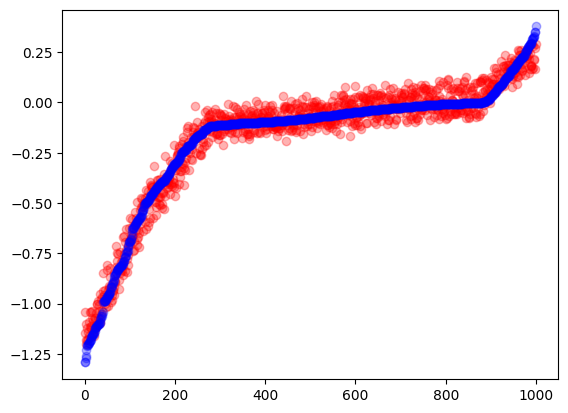

In [63]:
y_pred_sort, y_eval_sort = ut.sort_data(y_pred, y_eval)

i = range(len(y_pred_sort))
plt.scatter(i, y_pred_sort, alpha=0.3, color='red', label='Predictions')
plt.scatter(i, y_eval_sort, alpha=0.3, color='blue', label='True Values')

plt.show()

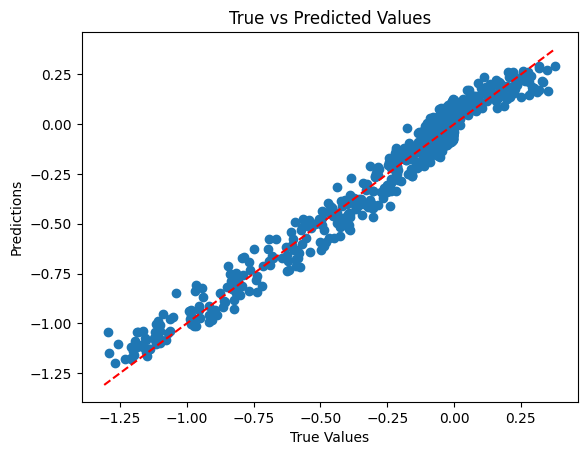

In [64]:
# 1. y_true vs y_pred
plt.scatter(y_eval, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--')
plt.title('True vs Predicted Values')
plt.show()


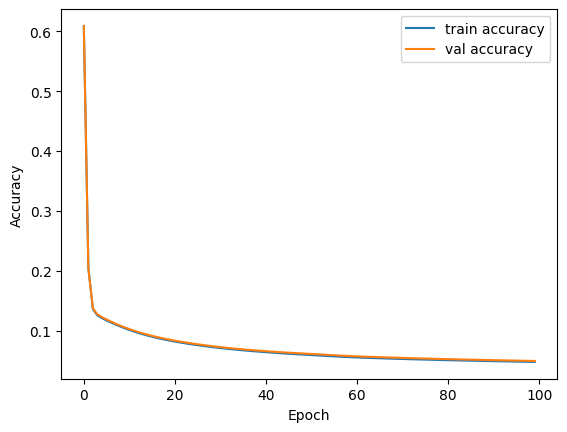

In [65]:
start_epoch = 0
end_epoch = len(train_accs)

plt.plot(train_accs[start_epoch:end_epoch], label='train accuracy')
plt.plot(val_accs[start_epoch:end_epoch], label='val accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### DL: 3 hidden layer, 

#### Load dataset and Set up mmodels

In [ ]:
# Overview (Deep Learning from Scratch):
# Input layer: sample_dims with 2 features input each 
# 1st Hidden Layer: 2 input dim, 5 output dim, ReLU activate funciton
# 2st Hidden Layer: 5 input dim, 5 output dim, ReLU activate funciton
# 3st Hidden Layer: 5 input dim, 5 output dim, ReLU activate funciton
# Output Layer: 5 input dim, 1 output dim, no activate funciton

sample_dim = 4000
split_ration = 0.8

input_dim = 2
h1_dim = 10
h2_dim = 5
h3_dim = 3
output_dim = 1

# Generate some linear sample_dim data
# linear [sample_dim_dim, 1]
linear = np.linspace(-1, 1, sample_dim).reshape(-1, 1)

# z [sample_dim, output_dim]
y_true = np.pow(linear,3) - np.pow(linear+0.2,2)*0.5 + np.pow(linear,2)*np.random.rand(sample_dim,output_dim)*0.1

# X [sample_dim, input_dim]
X = np.column_stack((linear, np.pow(linear, 2))).reshape(sample_dim, input_dim)+ np.random.rand(sample_dim,input_dim)*0.1

# Split dataset
X_train, y_train, X_eval, y_eval = ut.split_data(X, y_true, split_ration)
y_pred = np.random.rand(y_eval.shape[0], y_eval.shape[1])

# W1 [input_dim, h1_dim]
# b1 [1, h1_dim]
W1 = np.random.rand(input_dim,h1_dim) * np.sqrt(2/input_dim)
b1 = 0

# W2 [h1_dim, h2_dim]
# b2 [1, h2_dim]
W2 = np.random.rand(h1_dim,h2_dim) * np.sqrt(2/h1_dim)
b2 = 0

# W2 [h2_dim, W_h3]
# b2 [1, W_h3]
W3 = np.random.rand(h2_dim,h3_dim) * np.sqrt(2/h2_dim)
b3 = 0

# W2 [h1_dim, h2_dim]
# b2 [1, h2_dim]
W4 = np.random.rand(h3_dim,output_dim) * np.sqrt(2/h3_dim)
b4 = 0

# Hyperparameters
epochs = 100
batch_size = 16
learning_rate = 0.001

#### Visualize dataset

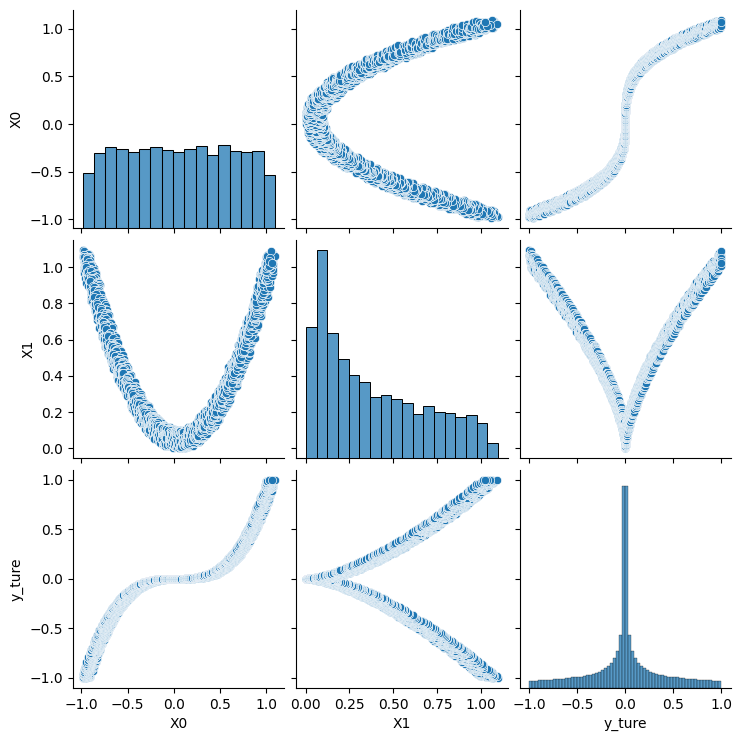

In [308]:
# put your inputs and outputs together in one DataFrame
df = pd.DataFrame(X, columns=[f"X{i}" for i in range(X.shape[1])])
df["y_ture"] = y_true if y_true.ndim == 1 else y_true[:,0]

# make the pairplot
sns.pairplot(df)

#### Train Models

In [309]:
def fit_linear_regression_three_hidden_layer(X_train, y_train, X_eval, y_eval, W1, b1, W2, b2, W3, b3, W4, b4, epochs=10, batch_size=32, learning_rate=0.001):
    train_accs = []
    val_accs = []

    for j in range(epochs):
        for i in range(0, len(X_train), batch_size):
            # Fetch the batch
            X_train_batch = X_train[i:i+batch_size]
            y_train_batch = y_train[i:i+batch_size]

            # Forward pass
            z1 = np.dot(X_train_batch, W1) + b1
            a1 = ut.relu(z1)

            z2 = np.dot(a1, W2) + b2
            a2 = ut.relu(z2)

            z3 = np.dot(a2, W3) + b3
            a3 = z3

            z4 = np.dot(a3, W4) + b4
            y_pred_batch = z4

            # Compute gradients
            # Mean Squared Error Loss: L = (1/N) * Σ(y_true - y_pred)^2
            # Gradient of L w.r.t. y_pred: 
            # dL/dz4 = (2/N) * (y_pred - y_true)

            # Using MAE at first load, and MSE follow it trend.
            # if i==0:
            #     loss_vector = np.where(y_pred_batch >= y_train_batch, 1, -1)
            #     dL_dz4 = (2/batch_size) * loss_vector
            # else:
            dL_dz4 = (2/batch_size) * (y_pred_batch - y_train_batch)

            # Gradient of L w.r.t. Z3:
            # dL/dz3 = da3/dz3 -> dz4/da3 -> dL/dz4
            # dL/dz3 = f'(z3) -> np.dot(..., W4.T) -> dL_dz4
            # dL/dz3 = f'(z3) -> np.dot(dL_z4, W4.T)
            dL_dz3 = np.dot(dL_dz4, W4.T) 

            # Gradient of L w.r.t. Z2:
            # dL/dz2 = da2/dz2 -> dz3/da2 -> dL/dz3
            # dL/dz3 = f'(z2) -> np.dot(..., W3.T) -> dL_dz3
            # dL/dz3 = f'(z2) -> np.dot(dL_z3, W3.T)
            dL_dz2 = ut.relu_derivative(z2) * np.dot(dL_dz3, W3.T) 

            # Gradient of L w.r.t. Z1:
            dL_dz1 = ut.relu_derivative(z1) * np.dot(dL_dz2, W2.T) 

            # Gradient of L w.r.t. W: 
            # dL/dW = dz4/dW -> dL/dz
            # dL/dW = np.dot(a.T, ...) -> dL_dz
            # dL/dW = np.dot(a.T, dL_dz)
            # Summation of Xi * Li
            dw4 = np.dot(a3.T, dL_dz4)
            dw3 = np.dot(a2.T, dL_dz3)
            dw2 = np.dot(a1.T, dL_dz2)
            dw1 = np.dot(X_train_batch.T, dL_dz1)  

            # Gradient of L w.r.t. b1: dL/db1 = Σ(dL/da)
            db4 = np.sum(dL_dz4, axis=0, keepdims=True)
            db3 = np.sum(dL_dz3, axis=0, keepdims=True)
            db2 = np.sum(dL_dz2, axis=0, keepdims=True)
            db1 = np.sum(dL_dz1, axis=0, keepdims=True)


            # Update weights and bias
            # Gradient Descent update rule
            # W = W - learning_rate * dL/dW
            W1 -= learning_rate * dw1
            W2 -= learning_rate * dw2
            W3 -= learning_rate * dw3
            W4 -= learning_rate * dw4


            # b = b - learning_rate * dL/db
            b1 -= learning_rate * db1
            b2 -= learning_rate * db2
            b3 -= learning_rate * db3
            b4 -= learning_rate * db4

        # Evaluate accuracy on the entire dataset after each epoch
        z1 = np.dot(X_eval, W1) + b1
        a1 = ut.relu(z1)

        z2 = np.dot(a1, W2) + b2
        a2 = ut.relu(z2)

        z3 = np.dot(a2, W3) + b3
        a3 = z3

        z4 = np.dot(a3, W4) + b4
        y_eval_pred = z4
        print(f"Epoch {j+1}/{epochs} accuracy: {ut.accuracy(y_eval, y_eval_pred):.3f}")

        z1 = np.dot(X_train, W1) + b1
        a1 = ut.relu(z1)

        z2 = np.dot(a1, W2) + b2
        a2 = ut.relu(z2)

        z3 = np.dot(a2, W3) + b3
        a3 = z3

        z4 = np.dot(a3, W4) + b4  
        y_train_pred= z4

        # Score History
        train_acc = ut.accuracy(y_train, y_train_pred)
        val_acc = ut.accuracy(y_eval, y_eval_pred)
        train_accs.append(train_acc)
        val_accs.append(val_acc)

    # Finised y_pred
    z1 = np.dot(X_eval, W1) + b1
    a1 = ut.relu(z1)

    z2 = np.dot(a1, W2) + b2
    a2 = ut.relu(z2)

    z3 = np.dot(a2, W3) + b3
    a3 = z3

    z4 = np.dot(a3, W4) + b4
    y_pred= z4

    return W1, b1, W2, b2, W3, b3, W4, b4, y_pred, train_accs, val_accs

In [310]:
"Before training, accuracy: {:.3f}".format(ut.accuracy(y_eval, y_pred))

'Before training, accuracy: 0.567'

In [319]:
W1, b1, W2, b2, W3, b3, W4, b4, y_pred, train_accs, val_accs = fit_linear_regression_three_hidden_layer(X_train, y_train, X_eval, y_eval, W1, b1, W2, b2, W3, b3, W4, b4, epochs=epochs, batch_size=batch_size, learning_rate=learning_rate)

Epoch 1/100 accuracy: 0.037
Epoch 2/100 accuracy: 0.037
Epoch 3/100 accuracy: 0.037
Epoch 4/100 accuracy: 0.037
Epoch 5/100 accuracy: 0.036
Epoch 6/100 accuracy: 0.036
Epoch 7/100 accuracy: 0.036
Epoch 8/100 accuracy: 0.036
Epoch 9/100 accuracy: 0.036
Epoch 10/100 accuracy: 0.036
Epoch 11/100 accuracy: 0.035
Epoch 12/100 accuracy: 0.035
Epoch 13/100 accuracy: 0.035
Epoch 14/100 accuracy: 0.035
Epoch 15/100 accuracy: 0.035
Epoch 16/100 accuracy: 0.035
Epoch 17/100 accuracy: 0.034
Epoch 18/100 accuracy: 0.034
Epoch 19/100 accuracy: 0.034
Epoch 20/100 accuracy: 0.034
Epoch 21/100 accuracy: 0.034
Epoch 22/100 accuracy: 0.034
Epoch 23/100 accuracy: 0.033
Epoch 24/100 accuracy: 0.033
Epoch 25/100 accuracy: 0.033
Epoch 26/100 accuracy: 0.033
Epoch 27/100 accuracy: 0.033
Epoch 28/100 accuracy: 0.033
Epoch 29/100 accuracy: 0.033
Epoch 30/100 accuracy: 0.033
Epoch 31/100 accuracy: 0.032
Epoch 32/100 accuracy: 0.032
Epoch 33/100 accuracy: 0.032
Epoch 34/100 accuracy: 0.032
Epoch 35/100 accuracy: 

In [312]:
"after training, accuracy: {:.3f}".format(ut.accuracy(y_eval, y_pred))

'after training, accuracy: 0.143'

#### Evaluate Models

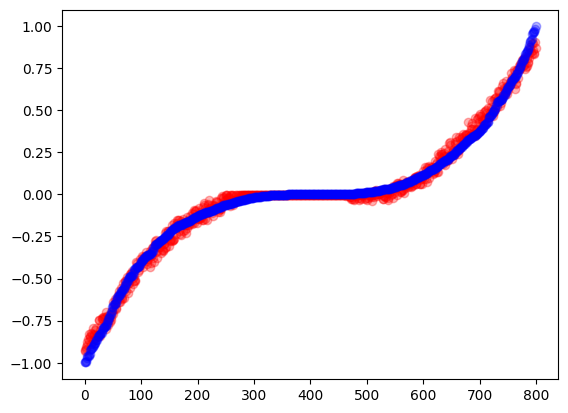

In [320]:
y_pred_sort, y_eval_sort = ut.sort_data(y_pred, y_eval)

i = range(len(y_pred_sort))
plt.scatter(i, y_pred_sort, alpha=0.3, color='red', label='Predictions')
plt.scatter(i, y_eval_sort, alpha=0.3, color='blue', label='True Values')

plt.show()

In [314]:
y_pred.shape

(800, 1)

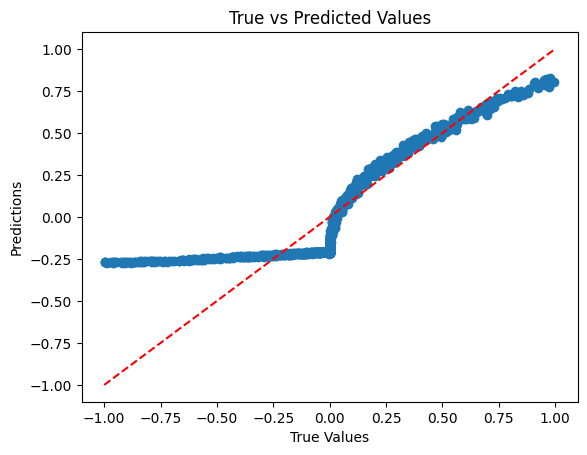

In [315]:
# 1. y_true vs y_pred
plt.scatter(y_eval, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--')
plt.title('True vs Predicted Values')
plt.show()


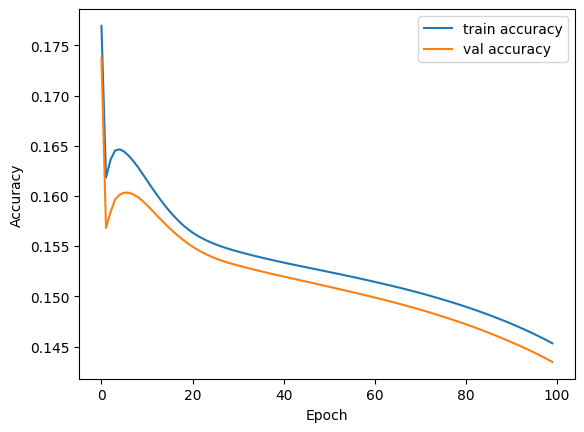

In [316]:
start_epoch = 0
end_epoch = len(train_accs)

plt.plot(train_accs[start_epoch:end_epoch], label='train accuracy')
plt.plot(val_accs[start_epoch:end_epoch], label='val accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Models Library Testing

In [76]:
model = my_models.Lr_Models()

In [77]:
model.add(50, input_shape=2)
model.add(30, activation="relu")
model.add(10, activation="relu")
model.add(10, activation="relu")
model.add(5)
model.add(1)

# model.add_layer(2,100)
# model.add_activate_func("relu")
# model.add_layer(100,50)
# model.add_activate_func("relu")
# model.add_layer(50, 10)
# model.add_layer(10, 1)

In [78]:
model.total_params()

2161

In [79]:
sample_dim = 4000
input_dim = 2
output_dim = 1
split_ration = 0.8

# Generate some linear sample_dim data
# linear [sample_dim_dim, 1]
linear = np.linspace(-1, 1, sample_dim).reshape(-1, 1)

# z [sample_dim, output_dim]
y_true = np.pow(linear,5)*0.5 + np.pow(linear, 1)*0.3 + np.pow(linear,2)*np.random.rand(sample_dim,output_dim)*0.1

y_true = np.abs(y_true)

# X [sample_dim, input_dim]
X = np.column_stack((linear, np.pow(linear, 3))).reshape(sample_dim, input_dim)+ np.random.rand(sample_dim,input_dim)*0.1

# Split dataset
X_train, y_train, X_eval, y_eval = ut.split_data(X, y_true, split_ration)
y_pred = np.random.rand(y_eval.shape[0], y_eval.shape[1])


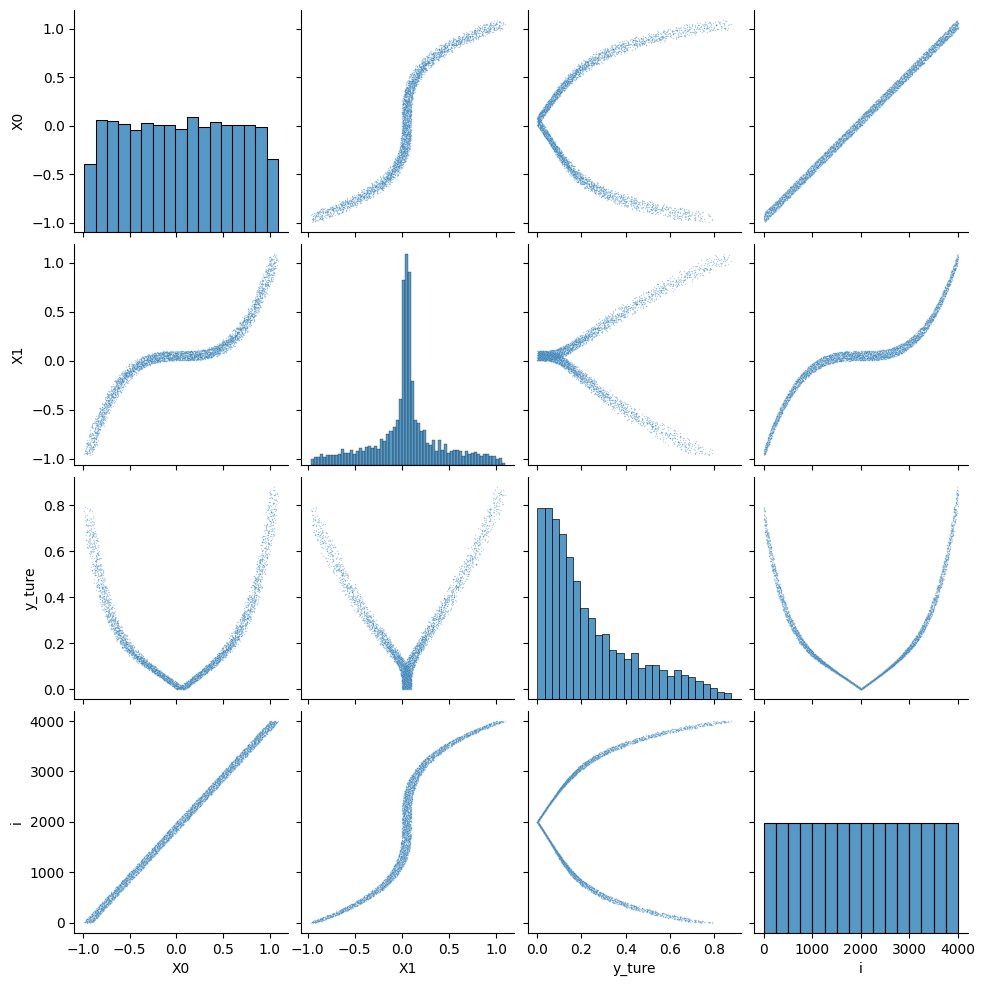

In [80]:
# put your inputs and outputs together in one DataFrame
i = np.arange(1, X.shape[0]+1)

df = pd.DataFrame(X, columns=[f"X{i}" for i in range(X.shape[1])])
df["y_ture"] = y_true if y_true.ndim == 1 else y_true[:,0]
df["i"] = i

# make the pairplot
sns.pairplot(df,  plot_kws={"alpha": 0.3, "s": 1})

In [81]:
history = model.fit(X_train, y_train, X_eval, y_eval, epochs=200, batch_size=8, learning_rate=0.00004)

Epoch 1/200 [=........................]
loss: 0.2945, val_loss: 0.2924

Epoch 2/200 [=........................]
loss: 0.1458, val_loss: 0.1444

Epoch 3/200 [=........................]
loss: 0.0957, val_loss: 0.0969

Epoch 4/200 [=........................]
loss: 0.0705, val_loss: 0.0732

Epoch 5/200 [=........................]
loss: 0.0582, val_loss: 0.0613

Epoch 6/200 [=........................]
loss: 0.0522, val_loss: 0.0555

Epoch 7/200 [=........................]
loss: 0.0486, val_loss: 0.0517

Epoch 8/200 [=........................]
loss: 0.0461, val_loss: 0.0489

Epoch 9/200 [==.......................]
loss: 0.0440, val_loss: 0.0467

Epoch 10/200 [==.......................]
loss: 0.0424, val_loss: 0.0449

Epoch 11/200 [==.......................]
loss: 0.0410, val_loss: 0.0434

Epoch 12/200 [==.......................]
loss: 0.0398, val_loss: 0.0421

Epoch 13/200 [==.......................]
loss: 0.0388, val_loss: 0.0411

Epoch 14/200 [==.......................]
loss: 0.0379, val_l

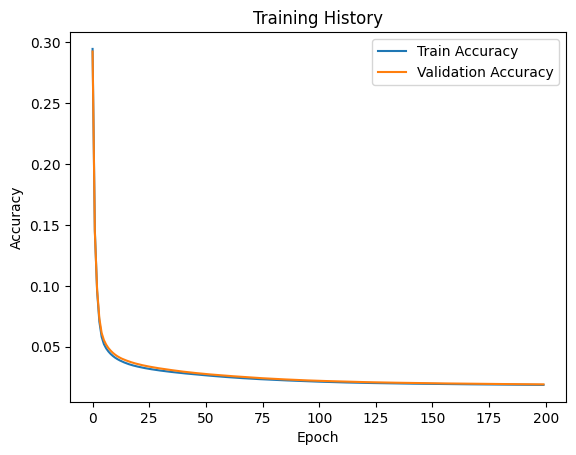

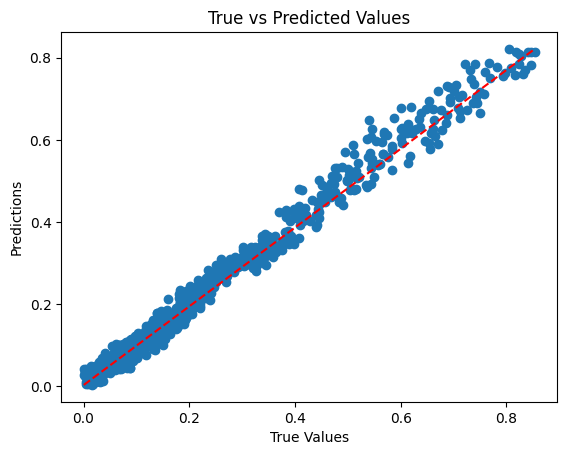

In [82]:
history.evaluate()

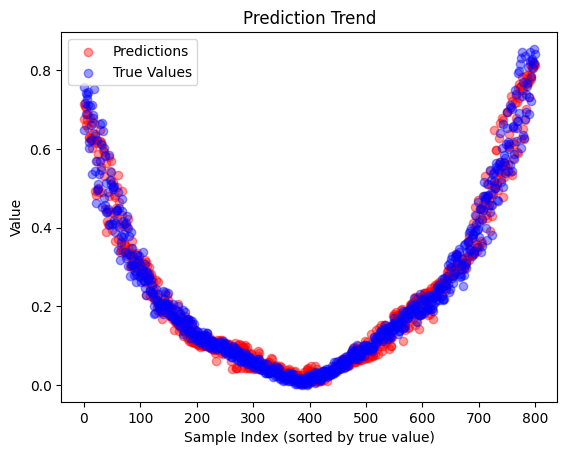

In [83]:
history.display_trend(ref="x", axis=0)

### Ideas Space

In [84]:
indices = np.arange(y_pred.shape[0])

In [85]:
np.random.shuffle(indices)
indices

array([502, 234, 413, 602, 729, 444, 559,  99, 712,  30, 629, 345, 313,
       360, 117, 684, 669, 236, 774,  36, 658, 344, 451, 756, 713,  22,
       761, 518, 225,  16, 511,  26,  77,  17,  37, 510, 696, 303, 516,
        62, 353,   7, 683,  94, 663, 429,  79,  63, 769, 396, 266, 771,
       260, 195, 188, 337,  90, 664, 666, 549, 372, 241, 128, 298, 125,
       230,  64, 661, 148, 448, 144, 691, 149, 379, 581, 446, 657, 509,
       745, 650,  81, 607, 627, 772, 172, 727, 563, 122, 431, 750, 150,
       550, 222, 139, 454,  45, 768, 419, 542, 218, 213, 527, 552, 331,
       795, 575, 608, 332,  32, 434, 423, 596, 167, 395, 242, 725, 317,
       710, 537, 405, 257,  92, 206,  72, 775,  84, 515, 610, 671, 299,
        44, 720,  55, 333, 496, 147, 797, 418, 432, 415, 350, 411,  51,
       644, 209, 272, 704, 138, 399, 160, 176, 779, 378, 156, 522, 489,
       287, 520, 612,  68,  29, 216, 770, 328, 569, 474,  41, 107, 735,
       247, 375, 641, 263,  40, 601, 576, 490, 380, 279, 239, 22

In [86]:
indices.reshape(-1, 1)

array([[502],
       [234],
       [413],
       [602],
       [729],
       [444],
       [559],
       [ 99],
       [712],
       [ 30],
       [629],
       [345],
       [313],
       [360],
       [117],
       [684],
       [669],
       [236],
       [774],
       [ 36],
       [658],
       [344],
       [451],
       [756],
       [713],
       [ 22],
       [761],
       [518],
       [225],
       [ 16],
       [511],
       [ 26],
       [ 77],
       [ 17],
       [ 37],
       [510],
       [696],
       [303],
       [516],
       [ 62],
       [353],
       [  7],
       [683],
       [ 94],
       [663],
       [429],
       [ 79],
       [ 63],
       [769],
       [396],
       [266],
       [771],
       [260],
       [195],
       [188],
       [337],
       [ 90],
       [664],
       [666],
       [549],
       [372],
       [241],
       [128],
       [298],
       [125],
       [230],
       [ 64],
       [661],
       [148],
       [448],
       [144],
      

In [87]:
np.sort(indices, axis=0)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [88]:
y_pred

array([[0.955],
       [0.243],
       [0.876],
       [0.199],
       [0.664],
       [0.809],
       [0.976],
       [0.174],
       [0.834],
       [0.697],
       [0.025],
       [0.401],
       [0.188],
       [0.581],
       [0.659],
       [0.523],
       [0.723],
       [0.15 ],
       [0.025],
       [0.03 ],
       [0.763],
       [0.118],
       [0.499],
       [0.365],
       [0.079],
       [0.578],
       [0.175],
       [0.197],
       [0.213],
       [0.225],
       [0.738],
       [0.774],
       [0.297],
       [0.529],
       [0.182],
       [0.935],
       [0.811],
       [0.719],
       [0.043],
       [0.611],
       [0.633],
       [0.361],
       [0.394],
       [0.757],
       [0.794],
       [0.767],
       [0.135],
       [0.451],
       [0.649],
       [0.939],
       [0.012],
       [0.066],
       [0.83 ],
       [0.219],
       [0.649],
       [0.033],
       [0.516],
       [0.441],
       [0.756],
       [0.394],
       [0.335],
       [0.938],
       [

In [89]:
np.column_stack((y_pred, indices))

array([[  0.955, 502.   ],
       [  0.243, 234.   ],
       [  0.876, 413.   ],
       ...,
       [  0.512, 719.   ],
       [  0.91 , 547.   ],
       [  0.764, 637.   ]], shape=(800, 2))